In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pokemon_cleaned.csv
/kaggle/input/Complete Pokemon.csv
/kaggle/input/Pokemon.csv


In [2]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

!pip install chart_studio
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

from chart_studio import tools
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly.offline import init_notebook_mode, iplot

     |████████████████████████████████| 81kB 3.8MB/s 


In [3]:
pokedata = pd.read_csv("../input/Pokemon.csv")

In [4]:
pokedata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokedata.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
#DATASET Cleaning
pokedata.columns = pokedata.columns.str.upper()
pokedata

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
pokedata['TYPE 2'].fillna(value='None', inplace=True)

In [8]:
pokedata.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [9]:
pokedata.tail()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [10]:
pokedata.count()

#             800
NAME          800
TYPE 1        800
TYPE 2        800
TOTAL         800
HP            800
ATTACK        800
DEFENSE       800
SP. ATK       800
SP. DEF       800
SPEED         800
GENERATION    800
LEGENDARY     800
dtype: int64

In [11]:
#Selecting subset of data
pokedata[10:15]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
10,8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,None,630,79,103,120,135,115,78,1,False
13,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,None,205,50,20,55,25,25,30,1,False


In [12]:
#Filtering DataFrames
pokedata['TYPE 2']=='Fairy'

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797    False
798    False
799    False
Name: TYPE 2, Length: 800, dtype: bool

In [13]:
pokedata[pokedata['SPEED']>150]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
431,386,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,True


In [14]:
pokedata[(pokedata['TYPE 1']=='Water') & (pokedata['SPEED']>100) & (pokedata['LEGENDARY']==False)]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
130,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False
349,319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False
466,419,Floatzel,Water,None,495,85,105,55,85,50,115,4,False
575,516,Simipour,Water,None,498,75,98,63,98,63,101,5,False
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
714,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False


In [15]:
pokedata['SPEED'].idxmax()

431

In [16]:
pokedata['SPEED'].idxmin()

230

In [17]:
pokedata.loc[[50]]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False


In [18]:
pokedata.loc[10:15]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
10,8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,None,630,79,103,120,135,115,78,1,False
13,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,None,205,50,20,55,25,25,30,1,False
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False


In [19]:
pokedata.loc[[pokedata['SPEED'].idxmax()]]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
431,386,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,True


In [20]:
pokedata.loc[[pokedata['SPEED'].idxmin()]]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


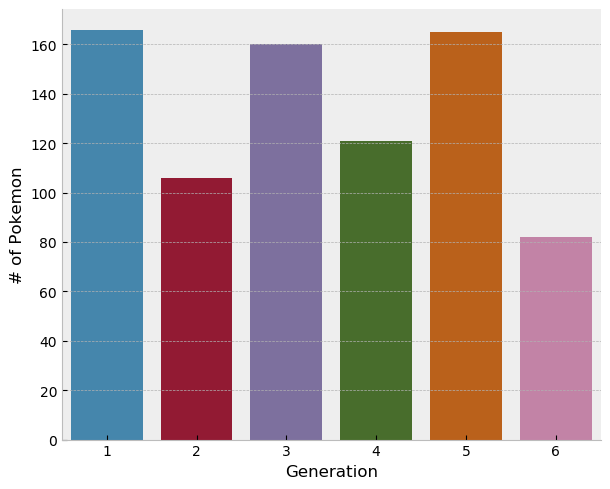

In [21]:
sns.catplot(
    x='GENERATION', 
    data=pokedata,
    height=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

In [22]:
#Count Legendary Pokemons
pokedata['LEGENDARY'].value_counts()

False    735
True      65
Name: LEGENDARY, dtype: int64

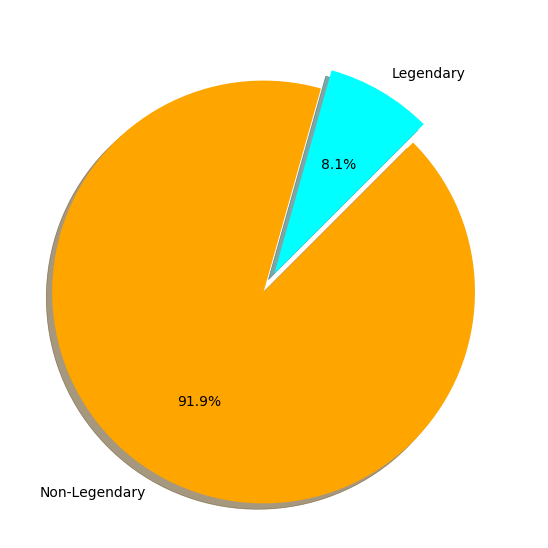

In [23]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
pokeLeg = pokedata[pokedata['LEGENDARY']==True]
pokeNon = pokedata[pokedata['LEGENDARY']==False]

legDist = [pokeLeg['NAME'].count(),pokeNon['NAME'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non-Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

So only 8.1% out of 800 Pokemon is a legendary Pokemon

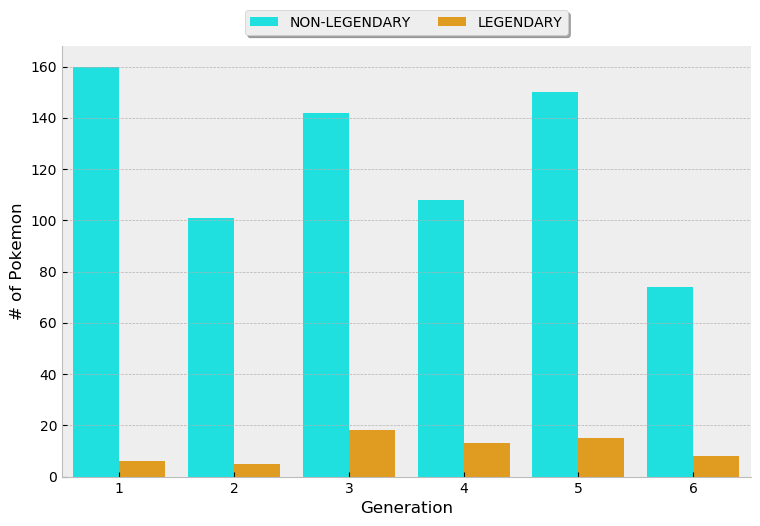

In [24]:
colours = ["aqua", "orange"]
g = sns.catplot(
    x='GENERATION', 
    data=pokedata,
    kind='count', 
    hue='LEGENDARY',
    palette=colours, 
    height=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Generation', '# of Pokemon')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['NON-LEGENDARY','LEGENDARY'])
plt.show()

In [25]:
pokedata['TYPE 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

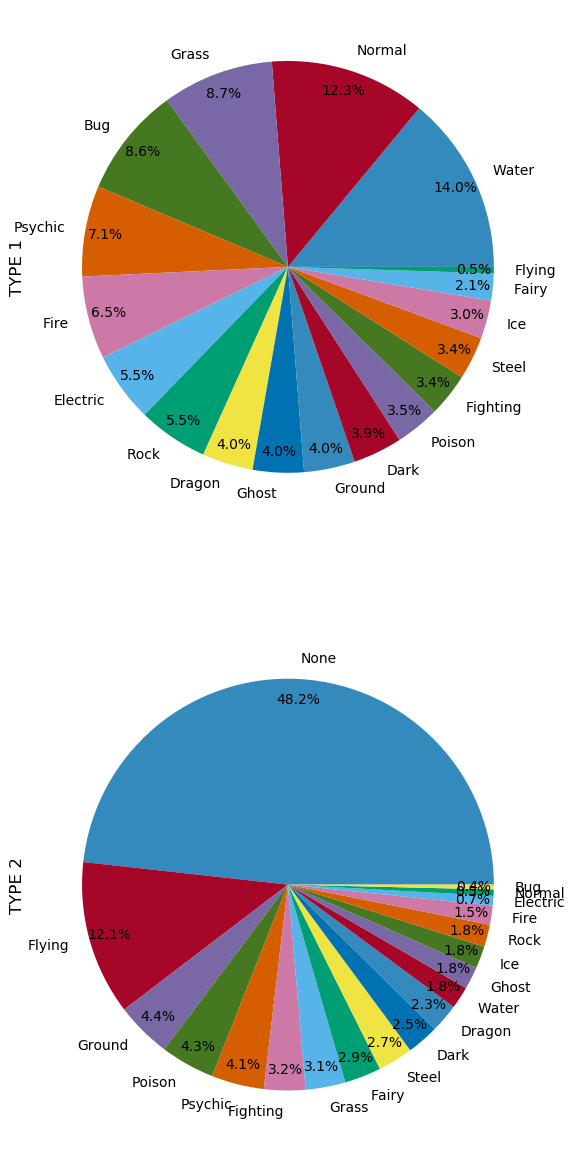

In [26]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
pokedata['TYPE 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)
fig.add_subplot(212)
pokedata['TYPE 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)
plt.show()

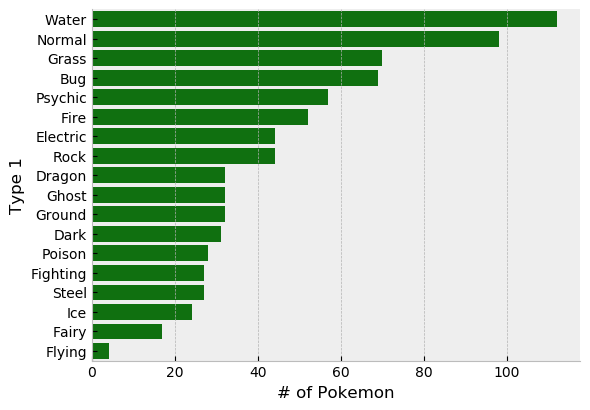

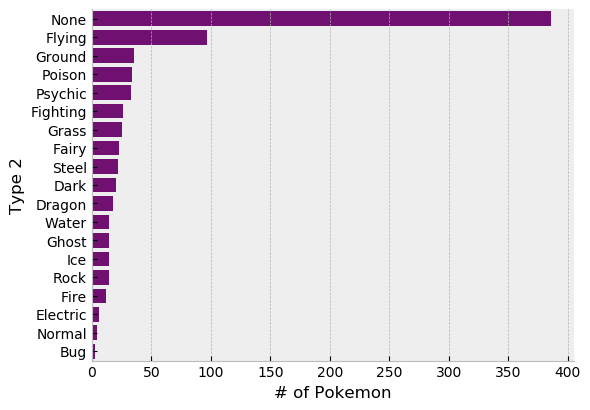

In [27]:
sns.catplot(
    y='TYPE 1',
    data=pokedata,
    kind='count',
    order=pokedata['TYPE 1'].value_counts().index,
    height=4,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.catplot(
    y='TYPE 2',
    data=pokedata,
    kind='count',
    order=pokedata['TYPE 2'].value_counts().index,
    height=4,
    aspect=1.5,
    color='purple'
).set_axis_labels('# of Pokemon', 'Type 2');

**Pokemon Type Combinations**

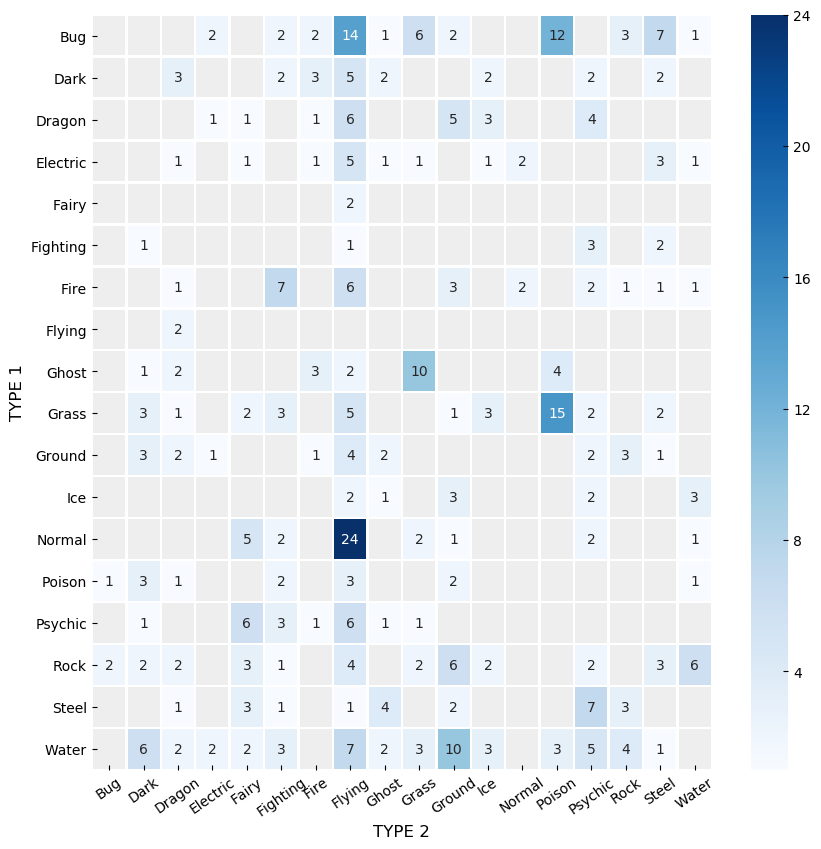

In [28]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    pokedata[pokedata['TYPE 2']!='None'].groupby(['TYPE 1', 'TYPE 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

**Plotly polar chart**

Polar charts or radar charts are a way of comparing multiple quantitative variables. 
This makes them useful for seeing which variables have similar values or if there are any outliers amongst each variable. 
Polar charts are also useful for seeing which variables are scoring high or low within a dataset, making them ideal for displaying performance.

In [29]:
#Plotly polar Chart
x = pokedata[pokedata["NAME"] == "Charizard"]
data = [go.Scatterpolar(
  r = [x['HP'].values[0],x['ATTACK'].values[0],x['DEFENSE'].values[0],x['SP. ATK'].values[0],x['SP. DEF'].values[0],x['SPEED'].values[0],x["HP"].values[0]],
  theta = ['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF','SPEED','HP'],
  fill = 'toself',
     line =  dict(
            color = 'orange'
        )
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = False,
  title = "{} stats distribution".format(x.NAME.values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.layout.images = [dict(
        source="https://raw.githubusercontent.com/ShaileshDhama/Analysis-on-POKEMON-Dataset/master/Charizard.png",
        xref="paper", yref="paper",
        x=0.95, y=0.3,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      )]

iplot(fig, filename = "Single Pokemon stats")

In [30]:
pokedata.loc[[pokedata['SPEED'].idxmax()]]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
431,386,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,True


In [31]:
x = pokedata[pokedata["NAME"] == "Ninjask"]
data = [go.Scatterpolar(
  r = [x['HP'].values[0],x['ATTACK'].values[0],x['DEFENSE'].values[0],x['SP. ATK'].values[0],x['SP. DEF'].values[0],x['SPEED'].values[0],x["HP"].values[0]],
  theta = ['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF','SPEED','HP'],
  fill = 'toself',
     line =  dict(
            color = 'darkkhaki'
        )
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = False,
  title = "{} stats distribution".format(x.NAME.values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.layout.images = [dict(
        source="https://raw.githubusercontent.com/ShaileshDhama/Analysis-on-POKEMON-Dataset/master/Ninjask.png",
        xref="paper", yref="paper",
        x=0.95, y=0.3,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      )]

iplot(fig, filename = "Single Pokemon stats")

In [32]:
from chart_studio import tools
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly.offline import init_notebook_mode, iplot

a = pokedata[pokedata["NAME"] == "Blastoise"]
b = pokedata[pokedata["NAME"] == "Charizard"]

data = [
    go.Scatterpolar(
        name = a.NAME.values[0],
        r = [x['HP'].values[0],x['ATTACK'].values[0],x['DEFENSE'].values[0],x['SP. ATK'].values[0],x['SP. DEF'].values[0],x['SPEED'].values[0],x["HP"].values[0]],
        theta = ['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF','SPEED','HP'],
        fill = 'toself',
        line =  dict(
                color = 'cyan'
            )
        ),
    go.Scatterpolar(
            name = b.NAME.values[0],
            r = [x['HP'].values[0],x['ATTACK'].values[0],x['DEFENSE'].values[0],x['SP. ATK'].values[0],x['SP. DEF'].values[0],x['SPEED'].values[0],x["HP"].values[0]],
            theta = ['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF','SPEED','HP'],
            fill = 'toself',
            line =  dict(
                color = 'orange'
            )
        )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.NAME.values[0], b.NAME.values[0])
)

fig = go.Figure(data=data, layout=layout)

fig.layout.images = [dict(
        source="https://raw.githubusercontent.com/ShaileshDhama/Analysis-on-POKEMON-Dataset/master/Blastoise.png",
        xref="paper", yref="paper",
        x=0.05, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ),
        dict(
        source="https://raw.githubusercontent.com/ShaileshDhama/Analysis-on-POKEMON-Dataset/master/Charizard.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ) ]


iplot(fig, filename = "Pokemon stats comparison")